In [1]:
# Riesenie Kristian Toldy, Predmet: Vyhladavanie Informacii FIIT STU

In [68]:
# Vypocet PageRanku
import scipy as sp
import scipy.sparse as sprs
import scipy.spatial
import scipy.sparse.linalg
from scipy import sparse

# Vstupy:
# G - CSR graph linkov
# D - Damping factor
# max_iter - maximalny pocet iteracii
# tolerancy -  Tolerianca ked uz convergujeme aby ukoncilo vykonavanie
def pagerank(G, D, max_iter, tolerancy=1e-12):
   

    # n pocet prvkov v grafe
    n, _ = G.shape
    # Spocita pocet outgoing linkov z pagy v nasej CSR matici (pre kazdy riadok)
    outgoing = sp.asarray(G.sum(axis=1)).reshape(-1)
    # indexes - indexy ktore su nenulove, teda maju outgoing link
    indexes = outgoing.nonzero()[0]
    # Nova matica kde vydelim hodnotu outgoing linkov poctom linkov (cim viac tim mensi zasah ma stranka)
    impact_csr = sprs.csr_matrix((1 / outgoing[indexes], (indexes, indexes)), shape=(n, n))

    # Vytvorenie jednotkoveho vektora
    ones = sp.ones(n) 
    ones = ones.reshape(n, 1)
    
    # a[np.newaxis, :] - > Pridanie dimenzie
    # Riesenie dangling nodes (nemaju ziadne outgoing, 
    # inicializujeme tie co nemaju ziadne outgoing linky na (1-dump)/n a tie co maju maju dump/n
    # Teoria - > ked neexistuje outgoing, tak mame nahodnu sancu otvorit akukolvek inu stranku (- dump)
    jumps = (((1 - D) * (outgoing != 0) + (outgoing == 0)) / n)[sp.newaxis, :]
    
    # A.T otoci smer ukazovania, pojdeme po linkoch namiesto po pagoch
    # W vypocita silu hrany (V podstate )
    W = D * G.T @ impact_csr
    
    # X pole page rankov (Na zaciatok vsetky jedna)
    x = ones
    # oldX v predchadzajucej iteracii pagerank, na zaciatok same nuly
    oldx = sp.zeros((n, 1))
    
    iteration = 0

    while sp.linalg.norm(x - oldx) > tolerancy:
        oldx = x
        # Vypocet noveho pageranku pre vsetky page 
        x = W @ x + ones @ (jumps @ x)
        iteration += 1
        if iteration >= max_iter:
            break
    x = x / sum(x)

    return x.reshape(-1)

In [85]:
import xml.sax
import re

# Regex pattern zakladne linky
#pattern = "\[\[(.*)\]\]"
pattern = "\[\[([^]]*)\]\]"

# Streamovy parser XML dat
class XMLHandler(xml.sax.ContentHandler):
    def __init__(self):
        self.CurrentData = ""
        self.title = ""
        self.id = ""
        self.text = ""
        
        
    def startElement(self, tag, attributes):
        self.CurrentData = tag
            
    def endElement(self, tag):
        #Vyskušame vždy pridať novú pagu do nášho dictionary (HashMapa)
        if self.CurrentData == "title":
            try:
                if dict[self.title]:
                    print("Duplicate found:", self.title)
            except KeyError:
                dict[self.title] = len(dict)
                list.append(self.title)
#        elif self.CurrentData == "text":
#            print("text: ", self.text)
#        elif self.CurrentData == "text":
#            if(re.search(pattern, self.text)):
#                links.append(self.title)
#                links.append(re.search(pattern, self.text).group(1))
                #print("Link: ", re.search(pattern, self.text).group(1))
                
            
        self.CurrentData = ""
        
    def characters(self, content):
        if self.CurrentData == "title":
            self.title = content
        elif self.CurrentData == "id":
            self.id = content
        elif self.CurrentData == "text":
            self.text = content
            if(re.search(pattern, self.text)):
                links.append(self.title)
                links.append(re.search(pattern, self.text).group(1))
        
if (__name__ == "__main__"):
    list = []  # < - Obsahuje zoznam pagov
    links = [] # < - Obsahuje zoznam linkov vo formate x, x+1 kde je title page1 ukazujucu na page2
    dict = {} # < - Hash mapa na rýchle nájdenie IDcka stranky podla title
    
    parser = xml.sax.make_parser()
    parser.setFeature(xml.sax.handler.feature_namespaces, 0)
    Handler = XMLHandler()
    parser.setContentHandler(Handler) 

In [70]:
# Na mensej vzorke dat:
# 10 pageov,
# 1 validny link na ine page, 1 bez landingu
parser.parse("C:/Users/krist/Desktop/Fiit/Vyhladavanie informacii/Testovanie/wiki2.xml")
print(links)

['MediaWiki:Developertitle', 'MediaWiki:Newmessages', 'MediaWiki:Developertitle', 'MediaWiki:Newmessages3', 'MediaWiki:Developertext', 'MediaWiki:Commentedit', 'MediaWiki:Searchresulttext', 'Pomoc:Vyhľadávanie2', 'MediaWiki:Searchresulttext', 'Pomoc:Vyhľadávanie']


In [71]:
# Vygenerovanie numpy arrayu linkov kde menime link title na ID
import numpy as np



list2 = np.empty((0,2), int)
for x in range(0, len(links),2):
    try:
        list2 = np.append(list2, np.array([[dict[links[x]], dict[links[x+1]]]]), axis=0)
    except KeyError:
        print("Link nenajdeny:", dict[links[x]]) # < - Ak pagu nepozname na ktorú ukazuje dá nám chybu a v ktorej page sa chyba vyskytla

print(list2)

Link nenajdeny: 0
Link nenajdeny: 9
Link nenajdeny: 9
[[0 3]
 [1 6]]


In [72]:
weights = [1] * len(list2)
G = sparse.csr_matrix((weights, (list2[:,0], list2[:,1])), shape=(len(list), len(list)))
rank=pagerank(G, D=0.85, max_iter=10)
rank

array([0.08547009, 0.08547009, 0.08547009, 0.15811966, 0.08547009,
       0.08547009, 0.15811966, 0.08547009, 0.08547009, 0.08547009])

In [73]:
# Vygenerovanie numpy arrayu linkov kde menime link title na ID
import numpy as np
from datetime import datetime

# Sem vlozte vas XML subor
list = []
links = []
dict = {}
parser.parse("C:/Users/krist/Desktop/Fiit/Vyhladavanie informacii/Testovanie/wiki.xml")

dateTimeObj = datetime.now()
print("Start:", dateTimeObj)

list2 = np.empty((0,2), int)
for x in range(0, len(links),2):
    try:
        list2 = np.append(list2, np.array([[dict[links[x]], dict[links[x+1]]]]), axis=0)
    except KeyError:
        pass
        # Schovame vypis error duplikatov lebo vypis dlho trva
        #print("Link nenajdeny:", dict[links[x]]) # < - Ak pagu nepozname na ktorú ukazuje dá nám chybu a v ktorej page sa chyba vyskytla

print(list2)
dateTimeObj = datetime.now()
print("Koniec:", dateTimeObj)

Duplicate found:  City Line
Duplicate found: B
Duplicate found: Y
Duplicate found: M
Duplicate found: T
Duplicate found:  Koch
Duplicate found:  Conquer
Duplicate found: W
Duplicate found: "
Duplicate found: "
Duplicate found: "
Duplicate found:  The Stooges
Duplicate found: Boca Juniors
Duplicate found: M
Duplicate found:  Bass
Duplicate found:  Coach
Duplicate found:  Bass
Duplicate found:  Bass
Duplicate found: 1966
Duplicate found: "
Duplicate found:  Breeze
Duplicate found:  Status
Duplicate found:  Koch
Duplicate found:  Status
Duplicate found: "
Duplicate found:  the Banshees
Duplicate found:  the Banshees
Duplicate found: "
Duplicate found: "
Duplicate found: T
Duplicate found:  Klement
Duplicate found: "
Duplicate found:  Bassline Smith
Duplicate found: B
Duplicate found: B
Duplicate found:  Futurebound
Duplicate found:  Evans
Duplicate found:  Status
Duplicate found:  Spoon
Duplicate found:  Krooked
Duplicate found:  Co Beschläge
Duplicate found:  KOS
Duplicate found:  Years


In [74]:
from scipy import sparse

# List jednotiek, su to nase vahy linkov, vsetky maju rovnaku silu
weights = [1] * len(list2)
# csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
# where data, row_ind and col_ind satisfy the relationship a[row_ind[k], col_ind[k]] = data[k]
# Shape musí obsahovať aj stranky bez odkazov, Len(list_stranok)
G = sparse.csr_matrix((weights, (list2[:,0], list2[:,1])), shape=(len(list), len(list)))
rank=pagerank(G, D=0.85, max_iter=100)
rank

array([3.76139033e-06, 6.02347948e-07, 6.02347948e-07, ...,
       3.34337136e-06, 3.41572678e-06, 3.50571571e-06])

In [76]:
# Hladanie najsilnejsieho pagu
iterator = 0
m = max(rank)
for x in rank:
    if x == m:
        print(iterator)
    iterator = iterator + 1
    

3255


In [78]:
iterator = 0
buck1 = 0 #0-1
buck2 = 0 #1-10
buck3 = 0 #10-X
for x in list:
    if x == 'Bratislava':
        print(iterator)
    if rank[iterator]*len(list) < 1:
        buck1 = buck1 + 1
    elif rank[iterator]*len(list) < 1000:
        buck2 = buck2 + 1
    else:
        buck3 = buck3 + 1
        print(x, 'Iterator: ', iterator, 'page rank: ', rank[iterator]*len(list))
    iterator = iterator + 1
print('buck1: ', buck1)
print('buck2: ', buck2)
print('buck3: ', buck3)

102
Kategória:Veda Iterator:  2805 page rank:  3194.018713580643
Kategória:Prírodné vedy Iterator:  2812 page rank:  1557.103980663861
Kategória:Základné kategórie Iterator:  3255 page rank:  5438.5904326784
Kategória:Človek Iterator:  4331 page rank:  2287.307141933284
Kategória:Spoločenské vedy Iterator:  4707 page rank:  1174.1580011899432
Kategória:Politika Iterator:  4734 page rank:  1051.5772348788757
Kategória:Medzinárodné organizácie Iterator:  4853 page rank:  1761.5751224002486
Kategória:OSN Iterator:  6688 page rank:  1231.578076448305
Kategória:Spoločnosť Iterator:  45962 page rank:  1610.2837994464153
Kategória:Členovia OSN Iterator:  89905 page rank:  1432.9782664993152
Kategória:Regióny vo Francúzsku Iterator:  218554 page rank:  1932.9338653889895
buck1:  381836
buck2:  36066
buck3:  11


In [79]:
# Vytvorenie indexov na vyhladavanie pomocou Whoosh
from whoosh.index import create_in
from whoosh.fields import *
import os
schema = Schema(title=TEXT(stored=True), xrank=NUMERIC(stored=True))

if not os.path.exists("whoosh"):
    os.mkdir("whoosh")
ix = create_in("whoosh", schema)
writer = ix.writer()
iterator = 0
adjuster = len(list)
for x in list:
    writer.add_document(title=x, xrank=rank[iterator]*adjuster)
    iterator = iterator + 1
    if (iterator % 100000 == 0):
        print("Done: ", iterator)
writer.commit()

Done:  100000
Done:  200000
Done:  300000
Done:  400000


In [80]:
# Query vyhladavanie
from whoosh.qparser import QueryParser

query = QueryParser("title", ix.schema).parse("Všeobecná banka")

with ix.searcher() as searcher:
    results = searcher.search(query)
    for result in results:
        print(result)

<Hit {'title': 'Všeobecná úverová banka', 'xrank': 1.4022221047542864}>


In [81]:
results

<Top 1 Results for And([Term('title', 'všeobecná'), Term('title', 'banka')]) runtime=0.0023809999984223396>

In [82]:
def hladaj(string):
    query = QueryParser("title", ix.schema).parse(string)
    with ix.searcher() as searcher:
        results = searcher.search(query)
        for result in results:
            print(result)

In [87]:
hladaj("Bratislava")

<Hit {'title': 'Bratislava', 'xrank': 230.3761363438216}>
<Hit {'title': 'Bratislava I', 'xrank': 3.4979775623666143}>
<Hit {'title': 'Bratislava V', 'xrank': 0.25949710296941325}>
<Hit {'title': 'Bratislava 5', 'xrank': 0.2517290380350724}>
<Hit {'title': 'Bratislava V.', 'xrank': 0.2517290380350724}>
<Hit {'title': 'Bratislava 1', 'xrank': 5.979789516201203}>
<Hit {'title': 'Bratislava 2', 'xrank': 2.8612652080542715}>
<Hit {'title': 'Bratislava 3', 'xrank': 1.041515768509582}>
<Hit {'title': 'Bratislava 4', 'xrank': 0.5127692708545895}>
<Hit {'title': 'Kategória:Bratislava', 'xrank': 194.31304676515282}>


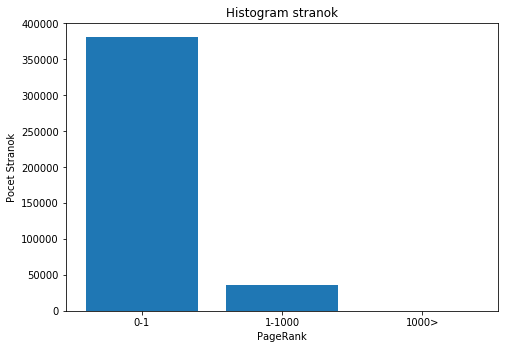

In [98]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bins = ['0-1', '1-1000', '1000>']
values = [buck1, buck2, buck3]
ax.bar(bins,values)
ax.set_ylabel('Pocet Stranok')
ax.set_xlabel('PageRank')
ax.set_title('Histogram stranok')
plt.show()